In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(x):
    value = 3 * x ** 2 - 4 * x + 5
    return value

In [3]:
f(3.0)

20.0

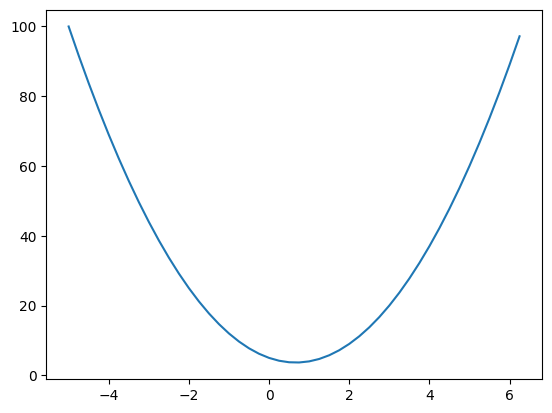

In [4]:
xs = np.arange(-5.0, 6.5, 0.25)
ys = f(xs)
plt.plot(xs, ys)

here I am going to take and derivative of f(x). As you know that 

dy/dx = (f(x + h) - f(x)) / h


In [5]:
h = 0.001
x = 3
(f(x + h) - f(x)) / h # derivative used here

14.00300000000243

More complex function. y = a * b + c. I am going to find dy/da, dy/db, dy/dc

In [6]:
h = 0.001
a = 2
b = 5
c = -1

y = a * b + c

dy/da

In [7]:
a = 2
b = 5
c = -1
dy = a * b + c

a += h
da = a * b + c

derivation_according_to_a = (da - dy) / h
print(derivation_according_to_a)

4.999999999999005


dy/db

In [8]:
a = 2
b = 5
c = -1
dy = a * b + c

b += h
db = a * b + c

derivation_according_to_b = (db - dy) / h
print(derivation_according_to_b)

2.000000000000668


dy/dc

In [9]:
a = 2
b = 5
c = -1
dy = a * b + c

c += h
dc = a * b + c

derivation_according_to_c = (dc - dy) / h
print(derivation_according_to_c)

0.9999999999994458


Visualization part of the values using DiGraph

In [10]:
from graphviz import Digraph

def trace(root):
    # builds a set of all nodes and edges in a graph
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges


def draw_dot(root):
    dot = Digraph(format="png", graph_attr={"rankdir":"LR"})  # LR = left to right

    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        # for any value in the graph, create a rectangular ('record') node for it
        dot.node(name=uid, label="{%s | data %.4f | grad %.4f}" % (n.label, n.data, n.grad), shape='record')
        if n._operation:
            # if this value is a result of some operation, create an op node for it
            dot.node(name=uid + n._operation, label=n._operation)
            # and connect this node to it
            dot.edge(uid + n._operation, uid)

    for n1, n2 in edges:
        # connect n1 to the op node of n2
        dot.edge(str(id(n1)), str(id(n2)) + n2._operation)

    return dot


# Micrograd

In [11]:
class Value:
    
    def __init__(self, data, _children = (), _operation = "", label = ""):
        self.data = data
        self.grad = 0.0
        self._prev = set(_children)
        self._operation = _operation
        self.label = label
        
    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        child = (self, other)
        operation  = "+"
        result = Value(self.data + other.data, _children=child, _operation=operation)
        return result
    
    def __mul__(self, other):
        child = (self, other)
        operation = "*"
        result = Value(self.data * other.data, _children=child, _operation=operation) 
        return result

In [12]:
a = Value(2.0, label = "a")
b = Value(-3.0, label = "b")
c = Value(10, label = "c")
e = a * b; e.label = "e"
d = e + c; d.label = "d"
f = Value(-2.0, label = "f")
L = d * f; L.label = "L"

# manually backpropagation (example 1)

dL / dL

In [13]:
L.grad = 1

dL / df

In [14]:
f.grad = 4

dL / dd

In [15]:
d.grad = -2

dL / de

In [16]:
e.grad = -2

dL / dc

In [17]:
c.grad = -2

dL / db

In [18]:
b.grad = -4

dL / da

In [19]:
a.grad = 6

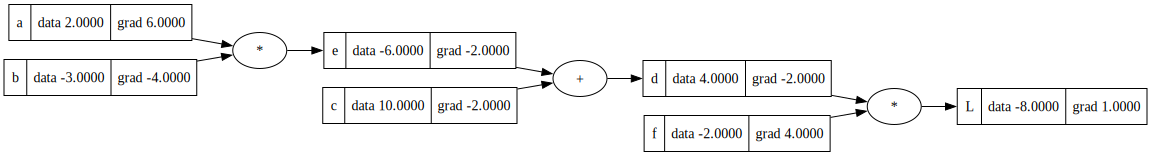

In [20]:
draw_dot(L)

# manually backpropagation (example 2 [tanh])

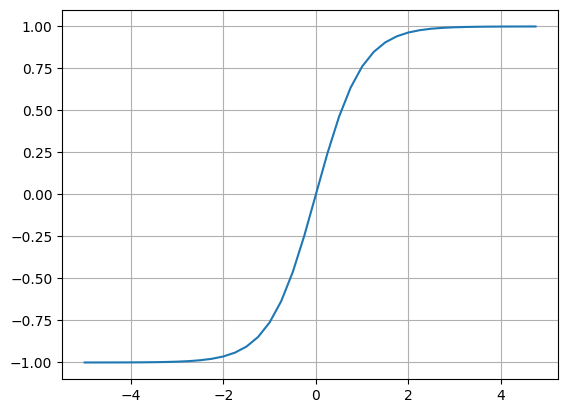

In [24]:
plt.plot(np.arange(-5.0, 5.0, 0.25), np.tanh(np.arange(-5.0, 5.0, 0.25)))
plt.grid()

I need tp find a sum and then I need to make a graph and then I need to set grads manually

In [25]:
x1 = Value(-5.0, label = "x1")
x2 = Value(-2.0, label = "x2")

w1 = Value(-6.0, label = "w1")
w2 = Value(-1.0, label = "w2")

b = Value(-0.4, label = "b")

total = x1 * w1 + x2 * w2 + b; total.label = "sum"
total

Value(data=31.6)